In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [2]:
df = pd.read_csv("./food_pref.csv")
df.head()

,sex,age,weight,activity_level,food_type,daily_food_amount,eating_duration,leftovers
0,male,15,10,sedentary,kibble,5,4,always
1,female,12,9,moderately_active,wet_food,3,2,sometimes
2,female,18,12,very_active,raw_food,6,5,never
3,male,15,10,moderately_active,raw_food,5,5,always
4,female,7,5,sedentary,wet_food,2,2,never


In [3]:
df['food_type'].value_counts()

food_type
raw_food    82
wet_food    60
kibble      59
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                201 non-null    object
 1   age                201 non-null    int64 
 2   weight             201 non-null    int64 
 3   activity_level     201 non-null    object
 4   food_type          201 non-null    object
 5   daily_food_amount  201 non-null    int64 
 6   eating_duration    201 non-null    int64 
 7   leftovers          201 non-null    object
dtypes: int64(4), object(4)
memory usage: 12.7+ KB


In [5]:
df.isnull().sum()

sex                  0
age                  0
weight               0
activity_level       0
food_type            0
daily_food_amount    0
eating_duration      0
leftovers            0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['activity_level'] = le.fit_transform(df['activity_level'])
df['leftovers'] = le.fit_transform(df['leftovers'])
df['food_type'] = le.fit_transform(df['food_type'])
df.head()

,sex,age,weight,activity_level,food_type,daily_food_amount,eating_duration,leftovers
0,1,15,10,1,0,5,4,0
1,0,12,9,0,2,3,2,2
2,0,18,12,2,1,6,5,1
3,1,15,10,0,1,5,5,0
4,0,7,5,1,2,2,2,1


In [7]:
most_pref_types = le.classes_
print(most_pref_types)

['kibble' 'raw_food' 'wet_food']


In [8]:
X = df.drop(columns=['food_type'])
y = df['food_type']
X.head(3)

,sex,age,weight,activity_level,daily_food_amount,eating_duration,leftovers
0,1,15,10,1,5,4,0
1,0,12,9,0,3,2,2
2,0,18,12,2,6,5,1


In [9]:
y.head(3)

0    0
1    2
2    1
Name: food_type, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [11]:
x_test

,sex,age,weight,activity_level,daily_food_amount,eating_duration,leftovers
47,1,16,15,0,5,5,1
68,0,10,8,2,3,4,1
179,0,14,13,2,5,5,0
57,0,15,10,1,5,5,1
89,0,7,6,2,3,5,0
...,...,...,...,...,...,...,...
70,1,7,6,1,3,5,0
143,0,13,10,1,4,3,1
105,0,13,10,2,4,3,2
134,0,12,9,1,3,4,0


In [12]:
x_train.shape

(140, 7)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])
print(x_test[:1])

    sex  age  weight  activity_level  daily_food_amount  eating_duration  \
84    1   14      13               0                  5                5   

    leftovers  
84          0  
[[ 0.84102145  0.41167663  0.7054108  -1.16897562  0.61930464  0.91734295
  -1.31820539]]
[[ 0.84102145  0.96320514  1.21316151 -1.16897562  0.61930464  0.91734295
  -0.10406885]]


In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [16]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs=200, verbose=2)

Epoch 1/200
5/5 - 0s - loss: 1.1984 - accuracy: 0.3071 - 418ms/epoch - 84ms/step
Epoch 2/200
5/5 - 0s - loss: 1.1718 - accuracy: 0.2643 - 6ms/epoch - 1ms/step
Epoch 3/200
5/5 - 0s - loss: 1.1122 - accuracy: 0.3500 - 6ms/epoch - 1ms/step
Epoch 4/200
5/5 - 0s - loss: 1.0890 - accuracy: 0.3571 - 6ms/epoch - 1ms/step
Epoch 5/200
5/5 - 0s - loss: 1.1159 - accuracy: 0.3571 - 5ms/epoch - 1000us/step
Epoch 6/200
5/5 - 0s - loss: 1.1454 - accuracy: 0.2857 - 6ms/epoch - 1ms/step
Epoch 7/200
5/5 - 0s - loss: 1.1085 - accuracy: 0.3143 - 5ms/epoch - 1000us/step
Epoch 8/200
5/5 - 0s - loss: 1.0803 - accuracy: 0.4071 - 5ms/epoch - 1ms/step
Epoch 9/200
5/5 - 0s - loss: 1.1029 - accuracy: 0.3643 - 6ms/epoch - 1ms/step
Epoch 10/200
5/5 - 0s - loss: 1.0771 - accuracy: 0.3714 - 6ms/epoch - 1ms/step
Epoch 11/200
5/5 - 0s - loss: 1.0739 - accuracy: 0.4143 - 5ms/epoch - 1000us/step
Epoch 12/200
5/5 - 0s - loss: 1.0993 - accuracy: 0.3929 - 6ms/epoch - 1ms/step
Epoch 13/200
5/5 - 0s - loss: 1.0808 - accuracy: 

In [19]:
x_test

array([[ 0.84102145,  0.96320514,  1.21316151, -1.16897562,  0.61930464,
         0.91734295, -0.10406885],
       [-1.18903032, -0.69138037, -0.56396596,  1.18579541, -1.00130564,
         0.27197605, -0.10406885],
       [-1.18903032,  0.41167663,  0.7054108 ,  1.18579541,  0.61930464,
         0.91734295, -1.31820539],
       [-1.18903032,  0.68744088, -0.05621526,  0.0084099 ,  0.61930464,
         0.91734295, -0.10406885],
       [-1.18903032, -1.51867313, -1.07171667,  1.18579541, -1.00130564,
         0.91734295, -1.31820539],
       [ 0.84102145, -0.13985187, -0.31009061, -1.16897562, -1.00130564,
         0.27197605,  1.1100677 ],
       [-1.18903032,  0.68744088,  0.95928615,  1.18579541,  0.61930464,
        -1.66412465, -1.31820539],
       [ 0.84102145, -1.51867313, -1.07171667,  0.0084099 , -1.00130564,
         0.91734295, -0.10406885],
       [ 0.84102145,  0.68744088, -0.05621526,  0.0084099 ,  0.61930464,
         0.91734295,  1.1100677 ],
       [-1.18903032,  0.9632

In [20]:
prediction = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [21]:
import numpy
numpy.array(x_test[0])

array([ 0.84102145,  0.96320514,  1.21316151, -1.16897562,  0.61930464,
        0.91734295, -0.10406885])

In [22]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# from tensorflow import keras
# from keras.models import load_model
# df = pd.read_csv("./food_pref.csv")
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# le = LabelEncoder()
# df['sex'] = le.fit_transform(df['sex'])
# df['activity_level'] = le.fit_transform(df['activity_level'])
# df['leftovers'] = le.fit_transform(df['leftovers'])
# df['food_type'] = le.fit_transform(df['food_type'])
# X = df.drop(columns=['food_type'])
# y = df['food_type']
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)
# x_train = sc.fit_transform(x_train)
# model = load_model('food_pref.h5')
# most_pref_types = le.classes_


# # Initialize an empty list to store the captured values
# captured_values = []

# # Define a while loop that continues indefinitely
# while True:
#     # Prompt the user for input
#     message = input("Enter a value (or type 'done' to finish): ")

#     # Check if the user wants to exit the loop
#     if message.lower() == 'done':
#         break  # Exit the loop if the user types 'done'

#     # Convert the input value to the appropriate data type and append it to the list
#     try:
#         value = float(message)  # Convert input to float
#         captured_values.append(value)
#     except ValueError:
#         print("Invalid input. Please enter a valid number.")

# # Ensure that exactly four values were captured
# if len(captured_values) == 7:  # Check if exactly five values were captured
#     # Assign the captured values to data1, data2, data3, and data4
#     data1, data2, data3, data4, data5, data6, data7 = captured_values
#     X_new = np.array([[data1 , data2, data3, data4 ,data5, data6, data7]])
#     x_test = sc.transform(X_new)
#     prediction = model.predict(x_test)
#     prediction1 = np.argmax(prediction, axis=-1)
#     print("Most Preffer Type:",most_pref_types[prediction1[:1][0]]," ",max(prediction[:1][0])*100,"%")
#     # x1_test = sc.transform([[data1, data2, data3, data4, data5]])
    
#     # Use the model to make predictions
#     # pred = model.predict([[data1, data2, data3, data4, data5]])
#     # pred_name = np.argmax(pred, axis=-1)
    
#     # Print the predictions
#     # print([[data1, data2, data3, data4, data5]].shape())
#     # print("Predictions:", pred_name)
# else:
#     print("Please enter exactly five values.")


In [23]:
model.save('food_pref.h5', model)

c:\Users\ashen\anaconda3\envs\detection\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# x_test = sc.transform(X_new)
# x_test

In [25]:
# prediction = model.predict(x_test)
# print(max(prediction[:10][0])*100)
# prediction = np.argmax(prediction, axis=-1)
# print(most_pref_types[prediction[:1][0]])

In [26]:
print(y_test[:5])

47     0
68     2
179    0
57     0
89     0
Name: food_type, dtype: int32


In [27]:
print(y_test.shape)
print(prediction.shape)

(61,)
(61, 3)


In [29]:
# Convert model predictions to class labels
predicted_labels = np.argmax(prediction, axis=1)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted_labels))

0.29508196721311475


In [32]:
cm = confusion_matrix(y_test, predicted_labels)
print(cm)

[[ 1 12  4]
 [ 6  8 10]
 [ 3  8  9]]


Text(50.581597222222214, 0.5, 'actual')

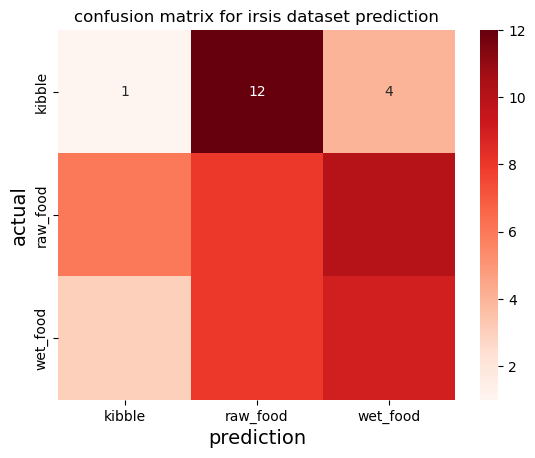

In [33]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=most_pref_types, yticklabels=most_pref_types)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)